### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [339]:
data = pd.read_csv('data/coupons.csv')

In [340]:
data.head(15)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [341]:
# The name of the column 'passanger' is spelled wrong.

# The columns describing user habits have missing values.
print('Bar unique values: ' + str(data['Bar'].unique()))
print('CoffeeHouse unique values: ' + str(data['CoffeeHouse'].unique()))
print('CarryAway unique values: ' + str(data['CarryAway'].unique()))
print('RestaurantLessThan20 unique values: ' + str(data['RestaurantLessThan20'].unique()))
print('Restaurant20To50 unique values: ' + str(data['Restaurant20To50'].unique()))

# The 'time' column is a string but could be numerical.
# If it were numerical, time could be compared more
# easily in a hierarchy of time.

# The column describing whether or not the coupon was
# accepted is named a rather undescriptive 'Y'.

# When the null values are totaled, the 'car' column has
# by far the most missing values. It is mostly missing values.
nulls_per_column = data.apply(lambda x: x.isnull()).sum()
print(type(nulls_per_column))
nulls_per_column.head(15)

null_fig = px.bar(nulls_per_column)
null_fig.update_layout(title='Nulls in Each Column', xaxis_title='Column', yaxis_title='Number of Null Values')
null_fig.show()

Bar unique values: ['never' 'less1' '1~3' 'gt8' nan '4~8']
CoffeeHouse unique values: ['never' 'less1' '4~8' '1~3' 'gt8' nan]
CarryAway unique values: [nan '4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20 unique values: ['4~8' '1~3' 'less1' 'gt8' nan 'never']
Restaurant20To50 unique values: ['1~3' 'less1' 'never' 'gt8' '4~8' nan]
<class 'pandas.core.series.Series'>


3. Decide what to do about your missing data -- drop, replace, other...

In [342]:
# There are enough missing values that dropping every row with missing values may not be practical
print('Total rows: ' + str(data.shape[0]))
no_nan = data.dropna()
print('Rows with no missing values: ' + str(no_nan.shape[0]))

# It would be helpful if the naming of columns were more consistent.
# I've tried to make capitalization and case mostly consistent in renaming.
data = data.rename(columns={'passanger':'passenger',
                            'maritalStatus':'marital_status',
                            'Bar':'bar',
                            'CoffeHouse':'coffeehouse',
                            'CarryAway':'carry_away',
                            'RestaurantLessThan20':'restaurant_less_than_20',
                            'Restaurant20To50':'restaurant_20_to_50',
                            'Y':'accepted'})

# Since the 'car' column is mostly missing values, it should be dropped.
data = data.drop('car', axis=1)

# With 'car' dropped, the number of rows with missing values is actually
# quite small compared to total number of rows, so those can now be dropped.
data = data.dropna()

Total rows: 12684
Rows with no missing values: 108


4. What proportion of the total observations chose to accept the coupon? 



In [343]:
data['accepted'].sum() / data.shape[0]

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 0, 'Coupons'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Number of Coupons Offered by Type')]

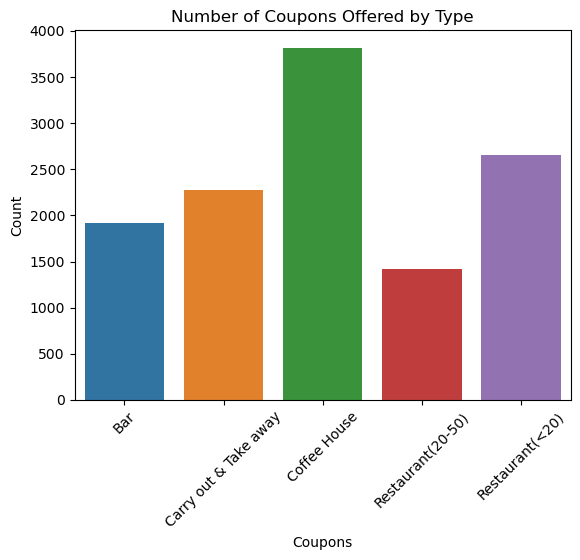

In [344]:
coupon_counts = data.groupby('coupon').count()
coupon_bars = sns.barplot(data=coupon_counts, x=coupon_counts.index, y='accepted')
plt.xticks(rotation=45)
coupon_bars.set(xlabel ="Coupons", ylabel = "Count", title ='Number of Coupons Offered by Type')

6. Use a histogram to visualize the temperature column.

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Temperatures Recorded')]

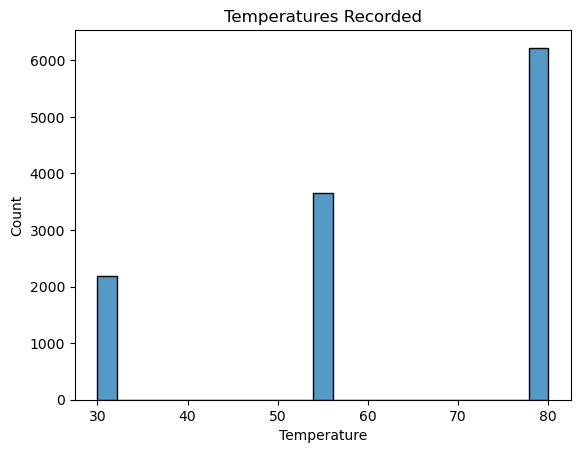

In [345]:
temp_hist = sns.histplot(data=data, x='temperature')
temp_hist.set(xlabel ="Temperature", ylabel = "Count", title ='Temperatures Recorded')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [346]:
bars = data.loc[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [347]:
bars['accepted'].sum() / bars.shape[0]

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [348]:
rare_visits = ['never', 'less1', '1~3']

rare_visitors = bars.loc[bars['bar'].isin(rare_visits)]
rare_acceptance = rare_visitors['accepted'].sum() / rare_visitors.shape[0]

frequent_visitors = bars.loc[~bars['bar'].isin(rare_visits)]
frequent_acceptance = frequent_visitors['accepted'].sum() / frequent_visitors.shape[0]

print('Acceptance rate for rare visitors: ' + format(rare_acceptance, '.0%'))
print('Acceptance rate for frequent visitors: ' + format(frequent_acceptance, '.0%'))

Acceptance rate for rare visitors: 37%
Acceptance rate for frequent visitors: 76%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [349]:
more_than_once = ['1~3', 'gt8', '4~8']
over_25 = ['46', '26', '31', '41', '50plus', '36']

barflies = bars.loc[(bars['bar'].isin(more_than_once)) & (bars['age'].isin(over_25))]
non_barflies = bars[~bars.index.isin(barflies.index)]

barfly_acceptance = barflies['accepted'].sum() / barflies.shape[0]
non_barfly_acceptance = non_barflies['accepted'].sum() / non_barflies.shape[0]

print('Acceptance rate for frequent bargoers over 25: ' + format(barfly_acceptance, '.0%'))
print('Acceptance rate for others offered a bar coupon: ' + format(non_barfly_acceptance, '.0%'))

Acceptance rate for frequent bargoers over 25: 69%
Acceptance rate for others offered a bar coupon: 34%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [350]:
non_kid = ['Friend(s)', 'Partner']
f_occupations = ['farming', 'fishing', 'forestry']

bar_visitors = bars.loc[bars['bar'].isin(more_than_once)]
non_kid_drivers = bars.loc[bars['passenger'].isin(non_kid)]
non_f_workers = bars[~bars['occupation'].isin(f_occupations)]

# I wasn't sure if the question was intended to analyze each of the three
# criteria individually or drivers who met all three criteria, so I did it
# both ways.
# First, each criteria considered individually:
bar_visitor_acceptance = bar_visitors['accepted'].sum() / bar_visitors.shape[0]
non_kid_driver_acceptance = non_kid_drivers['accepted'].sum() / non_kid_drivers.shape[0]
non_f_worker_acceptance = non_f_workers['accepted'].sum() / non_f_workers.shape[0]

print('Acceptance rate for people who visit a bar more than once a month: ' + format(bar_visitor_acceptance, '.0%'))
print('Acceptance rate for people with a passenger who is not a kid: ' + format(non_kid_driver_acceptance, '.0%'))
print('Acceptance rate for people who do not work in farming, fishing or forestry: ' + format(non_f_worker_acceptance, '.0%'))

# Now, drivers who meet all three criteria:
first_two = pd.merge(left=bar_visitors, right=non_kid_drivers, how='inner')
all_three = pd.merge(left=first_two, right=non_f_workers, how='inner')

all_three_acceptance = all_three['accepted'].sum() / bar_visitors.shape[0]
print('Acceptance rate for people who meet all three criteria: ' + format(all_three_acceptance, '.0%'))

Acceptance rate for people who visit a bar more than once a month: 69%
Acceptance rate for people with a passenger who is not a kid: 49%
Acceptance rate for people who do not work in farming, fishing or forestry: 41%
Acceptance rate for people who meet all three criteria: 24%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [351]:
category1 = bars.loc[(bars['bar'].isin(more_than_once)) & (bars['passenger'].isin(non_kid)) & (bars['marital_status'] != 'Widowed')]
category2 = bars.loc[(bars['bar'].isin(more_than_once)) & (bars['age'].isin(['below21', '21', '26']))]
category3 = bars.loc[(bars['restaurant_less_than_20'].isin(['4~8', 'gt8'])) & (bars['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]

category1_acceptance = category1['accepted'].sum() / category1.shape[0]
category2_acceptance = category2['accepted'].sum() / category2.shape[0]
category3_acceptance = category3['accepted'].sum() / category3.shape[0]

print('Acceptance rate for the first category: ' + format(bar_visitor_acceptance, '.0%'))
print('Acceptance rate for the second category: ' + format(non_kid_driver_acceptance, '.0%'))
print('Acceptance rate for the third category: ' + format(non_f_worker_acceptance, '.0%'))

Acceptance rate for the first category: 69%
Acceptance rate for the second category: 49%
Acceptance rate for the third category: 41%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [352]:
# Drivers who visit bars frequently are clearly more likely 
# to accept the coupon than everyone else. If they visit more than
# once a month, their likelihood of accepting is above 60 percent.
# If they visit more than three times a month, it's over 70 percent.
# It also helps if the driver has disposable income; drivers with
# less than 50K in annual income who frequently eat at cheap restaurants
# have only a 41 percent likelihood of accepting.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Restaurant Coupons - Expensive vs Inexpensive

When considering restaurant coupons, which drivers are most likely to accept? And does this acceptance rate vary from inexpensive restaurant coupons to expensive restaurant coupons? I examine three filters that I surmise will show the highest acceptance rates.

In [353]:
# I begin by isolating the data on restaurant coupons and visualizing a broad
# comparison of coupons for inexpensive restaurants to coupons for expensive restaurants.
# The sample of inexpensive restaurant coupons is larger, but the sample of
# expensive restaurant coupons still seems big enough to work with.
restaurants = data.loc[(data['coupon'] == 'Restaurant(<20)') | (data['coupon'] == 'Restaurant(20-50)')]

coupon_fig = px.histogram(restaurants, x=restaurants['coupon'], color='accepted')
coupon_fig.update_layout(title='Driver Totals and Acceptance for Restaurant Coupons', 
                         xaxis_title='Coupon Types', 
                         yaxis_title='Driver Count',
                         height=300,
                         width=500)
coupon_fig.show()

In [354]:
# The 'less than 20' subset holds all drivers whose coupon was for restaurants
# averaging less than $20 a person in meal cost
lt20 = data.loc[data['coupon'] == 'Restaurant(<20)']
# The 'less than 20 total' variable records how many rows are in the 'less than
# 20' subset
total_lt20 = lt20.shape[0]

# The 'accepted less than 20' subset holds all drivers who accepted coupons
# for restaurants averaging less than $20 a person in meal cost
accepted_lt20 = lt20.loc[data['accepted'] == True]
# 'Acceptace rate less than 20' records what percentage of drivers accepted
# a coupon for restaurants averaging less than $20 a person in meal cost
rate_lt20 = accepted_lt20.shape[0] / total_lt20

print('Acceptance rate of coupons for inexpensive restaurants: ' + format(rate_lt20, '.0%'))

Acceptance rate of coupons for inexpensive restaurants: 71%


In [355]:
# The 'more than 20' subset holds all drivers whose coupon was for restaurants
# averaging more than $20 a person in meal cost
mt20 = data.loc[data['coupon'] == 'Restaurant(20-50)']
# The 'more than 20 total' variable records how many rows are in the 'more than
# 20' subset
total_mt20 = mt20.shape[0]

# The 'accepted more than 20' subset holds all drivers who accepted coupons
# for restaurants averaging more than $20 a person in meal cost
accepted_mt20 = mt20.loc[data['accepted'] == True]
# 'Acceptace rate more than 20' records what percentage of drivers accepted
# a coupon for restaurants averaging more than $20 a person in meal cost
rate_mt20 = accepted_mt20.shape[0] / total_mt20

print('Acceptance rate of coupons for expensive restaurants: ' + format(rate_mt20, '.0%'))

Acceptance rate of coupons for expensive restaurants: 45%


# Inexpensive Restaurant Coupons

In [356]:
# I suspect that age may be a factor in acceptance of coupons for inexpensive restaurants.
# I want to visualize acceptance across ages to see if there are any obvious trends.
fig_lt20_ages = px.histogram(lt20, x=lt20['age'], color='accepted')
fig_lt20_ages.update_layout(title='Inexpensive Restaurant Acceptance by Age', 
                            xaxis_title='Ages', 
                            yaxis_title='Driver Count',
                            height=400,
                            width=600)
fig_lt20_ages.show()

In [357]:
# I suspect that income may be a factor in acceptance of coupons for inexpensive restaurants.
# I want to visualize acceptance across income levels to see if there are any obvious trends.
fig_lt20_incomes = px.histogram(lt20, x=lt20['income'], color='accepted')
fig_lt20_incomes.update_layout(title='Inexpensive Restaurant Acceptance by Income', 
                               xaxis_title='Income Levels', 
                               yaxis_title='Driver Count',
                               height=400,
                               width=600)
fig_lt20_incomes.show()

In [358]:
# The final obvious candidate for a column related to restaurant coupon acceptance
# is the driver's restaurant visitation habits.
# I want to visualize acceptance across habits to see if there are any obvious trends.
fig_lt20_habits = px.histogram(lt20, x=lt20['restaurant_less_than_20'], color='accepted')
fig_lt20_habits.update_layout(title='Inexpensive Restaurant Acceptance by Habit', 
                              xaxis_title='Inexpensive Restaurant Visits Per Month', 
                              yaxis_title='Driver Count',
                              height=400,
                              width=600)
fig_lt20_habits.show()

In [359]:
# Here I calculate the acceptance rates of what I expect, are the highest
# acceptance categories (without the sample size getting too small).

# For this part, the income range '$75000 - $87499' is actually 1 percent higher
# than the range I selected, but that range has no overlap with the other
# "best" filters, do when multiple factors are considered in search of the
# ideal target demographic, it's more helpful to use the income range of '$12500 - $24999'.
lt20_best_age = lt20.loc[lt20['age'] == '21']
lt20_best_income = lt20.loc[lt20['income'] == '$12500 - $24999']
lt20_best_habit = lt20.loc[lt20['restaurant_less_than_20'] == 'gt8']

lt20_best_age_acceptance = lt20_best_age['accepted'].sum() / lt20_best_age.shape[0]
lt20_best_income_acceptance = lt20_best_income['accepted'].sum() / lt20_best_income.shape[0]
lt20_best_habit_acceptance = lt20_best_habit['accepted'].sum() / lt20_best_habit.shape[0]

# I calculate the acceptance rate for drivers who meet all three criteria for
# high acceptance. I consider this the target demographic for these coupons.
lt20_best_a_i = pd.merge(left=lt20_best_age, right=lt20_best_income, how='inner')
lt20_best_overall = pd.merge(left=lt20_best_a_i, right=lt20_best_habit, how='inner')

lt20_target_acceptance = lt20_best_overall['accepted'].sum() / lt20_best_overall.shape[0]

print('Acceptance rate for the highest acceptance age: ' + format(lt20_best_age_acceptance, '.0%'))
print('Acceptance rate for the highest acceptance income: ' + format(lt20_best_income_acceptance, '.0%'))
print('Acceptance rate for the highest acceptance habit: ' + format(lt20_best_habit_acceptance, '.0%'))

# Even though the number of drivers matching all three ideal criteria
# is not 0, it is very low. With such a small sample size, the 100%
# acceptance produced here doesn't tell us much.
print('Acceptance rate for drivers of the highest acceptance age, income and habit: ' + format(lt20_target_acceptance, '.0%'))

Acceptance rate for the highest acceptance age: 74%
Acceptance rate for the highest acceptance income: 68%
Acceptance rate for the highest acceptance habit: 76%
Acceptance rate for drivers of the highest acceptance age, income and habit: 100%


# Expensive Restaurant Coupons

In [360]:
fig_mt20_ages = px.histogram(mt20, x=mt20['age'], color='accepted', color_discrete_map={'1':'purple', '0':'green'})
fig_mt20_ages.update_layout(title='Expensive Restaurant Acceptance by Age', 
                            xaxis_title='Ages', 
                            yaxis_title='Driver Count',
                            height=400,
                            width=600)
fig_mt20_ages.show()

In [361]:
fig_mt20_incomes = px.histogram(mt20, x=mt20['income'], color='accepted', color_discrete_map={'1':'purple', '0':'green'})
fig_mt20_incomes.update_layout(title='Expensive Restaurant Acceptance by Income', 
                               xaxis_title='Income Levels', 
                               yaxis_title='Driver Count',
                               height=400,
                               width=600)
fig_mt20_incomes.show()

In [362]:
fig_mt20_habits = px.histogram(mt20, x=mt20['restaurant_20_to_50'].sort_values(), color='accepted', color_discrete_map={'1':'purple', '0':'green'})
fig_mt20_habits.update_layout(title='Expensive Restaurant Acceptance by Habit', 
                              xaxis_title='Expensive Restaurant Visits Per Month', 
                              yaxis_title='Driver Count',
                              height=400,
                              width=600)
fig_mt20_habits.show()

In [363]:
# I repeat the acceptance rate calculations I did with the coupons for inexpensive
# restaurants, this time with coupons for expensive restaurants.
# Once again, I seek out the best acceptance rates that don't have too small a sample size.
mt20_best_age = mt20.loc[mt20['age'] == '26']
mt20_best_income = mt20.loc[mt20['income'] == '$25000 - $37499']
mt20_best_habit = mt20.loc[mt20['restaurant_20_to_50'] == '1~3']

mt20_best_age_acceptance = mt20_best_age['accepted'].sum() / mt20_best_age.shape[0]
mt20_best_income_acceptance = mt20_best_income['accepted'].sum() / mt20_best_income.shape[0]
mt20_best_habit_acceptance = mt20_best_habit['accepted'].sum() / mt20_best_habit.shape[0]

mt20_best_a_i = pd.merge(left=mt20_best_age, right=mt20_best_income, how='inner')
mt20_best_overall = pd.merge(left=mt20_best_a_i, right=mt20_best_habit, how='inner')

mt20_target_acceptance = mt20_best_overall['accepted'].sum() / mt20_best_overall.shape[0]

print('Acceptance rate for the highest acceptance age: ' + format(mt20_best_age_acceptance, '.0%'))
print('Acceptance rate for the highest acceptance income: ' + format(mt20_best_income_acceptance, '.0%'))
print('Acceptance rate for the highest acceptance habit: ' + format(mt20_best_habit_acceptance, '.0%'))

print('Acceptance rate for drivers of the highest acceptance age, income and habit: ' + format(mt20_target_acceptance, '.0%'))

Acceptance rate for the highest acceptance age: 51%
Acceptance rate for the highest acceptance income: 53%
Acceptance rate for the highest acceptance habit: 53%
Acceptance rate for drivers of the highest acceptance age, income and habit: 62%


# Conclusion

In [364]:
# I want to illustrate the most one can improve the acceptance rate for
# these coupons using one of the filters examined in this document.
percentages = pd.DataFrame({'name': ['All Inexpensive', 
                                     '>8 Trips Inexpensive', 
                                     'All Expensive', 
                                     '1~3 Trips Expensive'], 
                            'acceptance_percentage': [rate_lt20, 
                                                      lt20_best_habit_acceptance, 
                                                      rate_mt20, 
                                                      mt20_best_habit_acceptance]})
percent_fig = px.bar(percentages, x='name', y='acceptance_percentage')
percent_fig.update_layout(title='Restaurant Coupon Acceptance', 
                          xaxis_title='Sample', 
                          yaxis_title='Acceptance',
                          height=400,
                          width=600)
percent_fig.show()

In [365]:
# The depiction of percentages above should be considered alongside information
# about the size of each sample. Even without seeking out heavily filtered target
# demographics, the filtered samples are not terribly large relative to the total
# of drivers.
totals = pd.DataFrame({'name': ['All Inexpensive', 
                                     'Best Habit Inexpensive', 
                                     'All Expensive', 
                                     '1~3 Trips Expensive'], 
                            'total_drivers': [total_lt20, 
                                                      lt20_best_habit.shape[0], 
                                                      total_mt20, 
                                                      mt20_best_habit.shape[0]]})
totals_fig = px.bar(totals, x='name', y='total_drivers')
totals_fig.update_layout(title='Restaurant Coupon Sample Size', 
                         xaxis_title='Sample', 
                         yaxis_title='Driver Total',
                         height=400,
                         width=600)
totals_fig.show()

Ultimately, while restaurant-visiting habits turned out to affect chances of coupon acceptance for restaurant coupons, the difference it represented was modest and samples with the highest acceptance rates also proved fairly small. The data illustrates the risk of overemphasizing the significance of appealing subsets.